In [4]:
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [5]:
BASE_DIR = r"D:\project\Localens_experiment"
DATASET_DIR = os.path.join(BASE_DIR, "dataset")
NEW_IMG_DIR = os.path.join(BASE_DIR, "new_images")
CSV_PATH = os.path.join(BASE_DIR, "color_features.csv")

In [8]:
CSV_PATH = os.path.join(BASE_DIR, "image_data.csv")

def classify_color(h, s, v):
    h = int(h)
    s = int(s)
    v = int(v)
    h_deg = h * 2 

    if v < 40 and s < 60:
        return "black"
    if v > 230 and s < 30:
        return "white"
    if v > 180 and s < 40:
        return "gray"

    if h_deg < 15 or h_deg > 345:
        return "red"

    if 15 <= h_deg <= 35:
        if v < 120:
            return "brown"   
        elif 120 <= v <= 200:
            return "orange" 
        else:
            return "yellow"  

    if 35 < h_deg <= 85:
        return "green"
    if 85 < h_deg <= 150:
        return "cyan"
    if 150 < h_deg <= 260:
        return "blue"
    if 260 < h_deg <= 320:
        return "purple"
    if 320 < h_deg <= 345:
        return "pink"

    return "unknown"

def extract_dominant_color_lab(image, k=5):
    
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    pixels = lab.reshape(-1, 3)


    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)

    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    dominant_cluster = unique[np.argmax(counts)]
    dominant_color = kmeans.cluster_centers_[dominant_cluster]

    lab_color = np.uint8([[dominant_color]])
    bgr_color = cv2.cvtColor(lab_color, cv2.COLOR_LAB2BGR)
    hsv_color = cv2.cvtColor(bgr_color, cv2.COLOR_BGR2HSV)[0][0]

    h, s, v = hsv_color
    label = classify_color(h, s, v)

    return h, s, v, label

def process_image(image_path):

    img = cv2.imread(image_path)
    if img is None:
        return None

    img = cv2.resize(img, (224, 224))
    h, s, v, label = extract_dominant_color_lab(img)
    rgb = cv2.cvtColor(np.uint8([[[h, s, v]]]), cv2.COLOR_HSV2RGB)[0][0]
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    return {
        "path": image_path,
        "R": int(rgb[0]), "G": int(rgb[1]), "B": int(rgb[2]),
        "H": int(h), "S": int(s), "V": int(v),
        "label": label,
        "timestamp": timestamp
    }

records = []
print("🔍 Scanning dataset folders...\n")

for folder in os.listdir(DATASET_DIR):
    folder_path = os.path.join(DATASET_DIR, folder)
    if not os.path.isdir(folder_path):
        continue

    for fname in tqdm(os.listdir(folder_path), desc=f"Scanning {folder}"):
        fpath = os.path.join(folder_path, fname)
        result = process_image(fpath)
        if result:
            records.append(result)

df = pd.DataFrame(records)
df.to_csv(CSV_PATH, index=False)

print(f"\n✅ Dataset processed and saved to {CSV_PATH}")
print(f"📸 Total images processed: {len(df)}")



🔍 Scanning dataset folders...



Scanning unlabeled: 100%|██████████████████████████████████████████████████████████████| 87/87 [00:31<00:00,  2.75it/s]


✅ Dataset processed and saved to D:\project\Localens_experiment\image_data.csv
📸 Total images processed: 321



🎨 Color search ready! Type a color (e.g., 'red', 'blue') or 'exit' to quit.



Search color:  green



🎯 Top 10 matches for 'green':

🖼️ D:\project\Localens_experiment\dataset\extra\terrier-g5cb29fa82_640.jpg | RGB=(109,130,50) | Date=2025-10-31 16:25:17


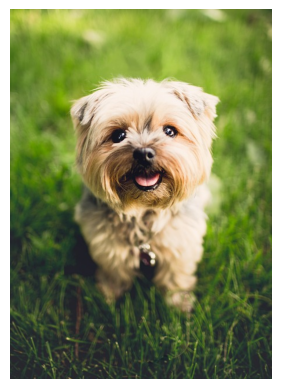

🖼️ D:\project\Localens_experiment\dataset\extra\child-g8f11ee379_640.jpg | RGB=(97,126,74) | Date=2025-10-31 16:24:58


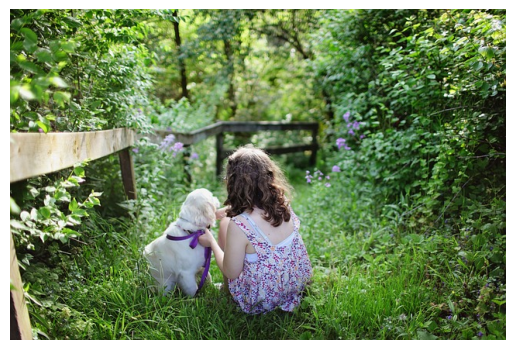

🖼️ D:\project\Localens_experiment\dataset\extra\family-gdcb5d5e9a_640.jpg | RGB=(74,102,77) | Date=2025-10-31 16:25:02


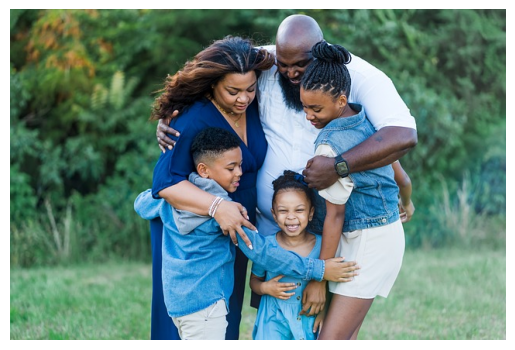

🖼️ D:\project\Localens_experiment\dataset\extra\couple-g0b2ee91be_640.jpg | RGB=(131,161,101) | Date=2025-10-31 16:24:58


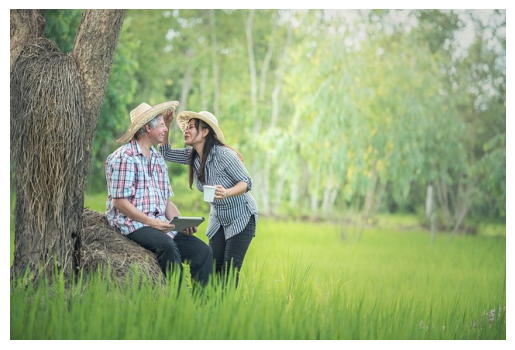

🖼️ D:\project\Localens_experiment\dataset\extra\grandmother-g010adc60b_640.jpg | RGB=(106,125,90) | Date=2025-10-31 16:25:06


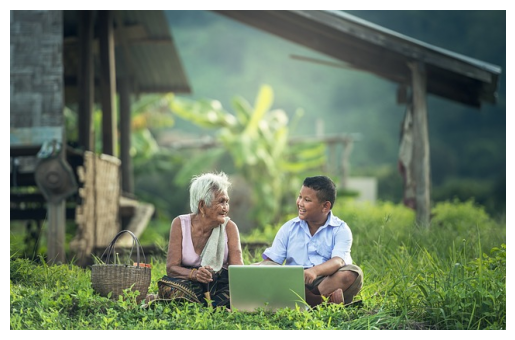

🖼️ D:\project\Localens_experiment\dataset\extra\cat-g6052b543b_640.jpg | RGB=(142,154,82) | Date=2025-10-31 16:24:55


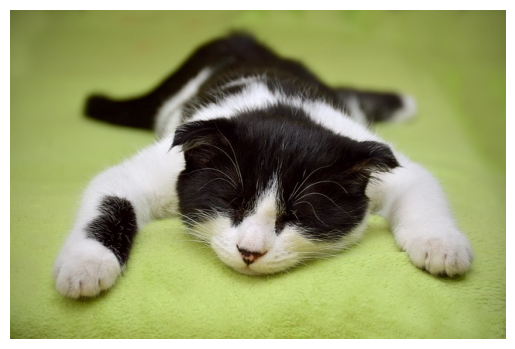

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230903-WA0000.jpg | RGB=(82,93,72) | Date=2025-10-31 16:25:45


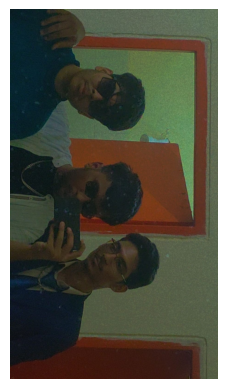

🖼️ D:\project\Localens_experiment\dataset\extra\puppy-g0235e261e_640.jpg | RGB=(155,158,69) | Date=2025-10-31 16:25:13


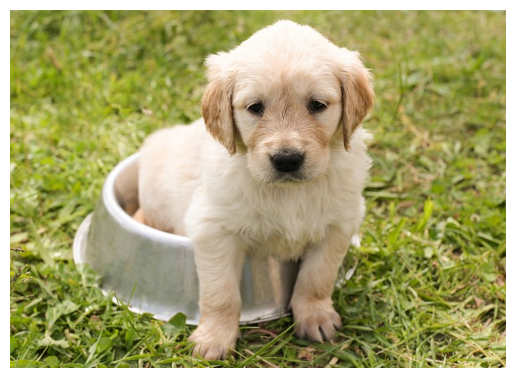

🖼️ D:\project\Localens_experiment\dataset\extra\in-love-g33a19ee34_640.jpg | RGB=(87,87,65) | Date=2025-10-31 16:25:07


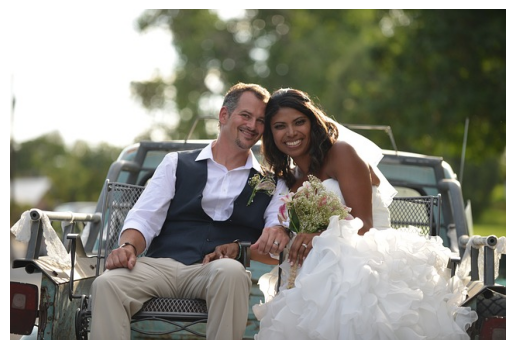

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230902-WA0067.jpg | RGB=(92,88,63) | Date=2025-10-31 16:25:40


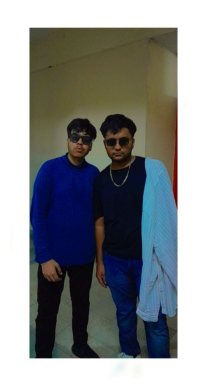

Search color:  black



🎯 Top 10 matches for 'black':

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230903-WA0001.jpg | RGB=(0,0,0) | Date=2025-10-31 16:25:46


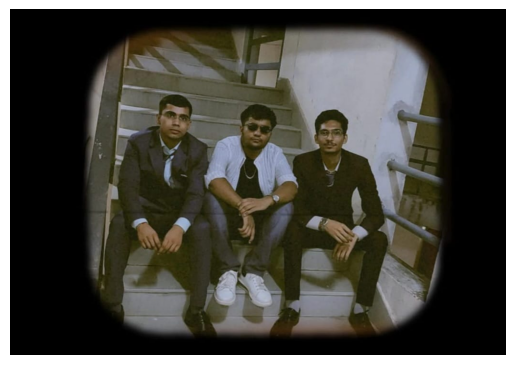

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230902-WA0086.jpg | RGB=(0,0,0) | Date=2025-10-31 16:25:44


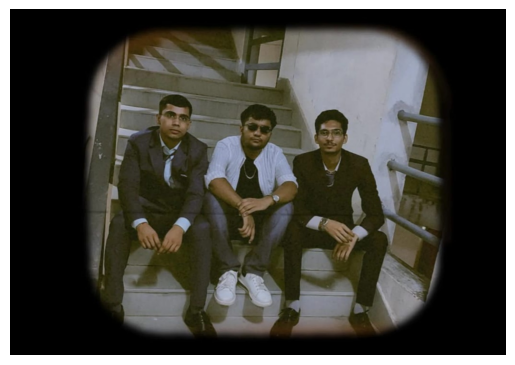

🖼️ D:\project\Localens_experiment\dataset\extra\girl-gb9f87fafe_640.jpg | RGB=(6,6,6) | Date=2025-10-31 16:25:05


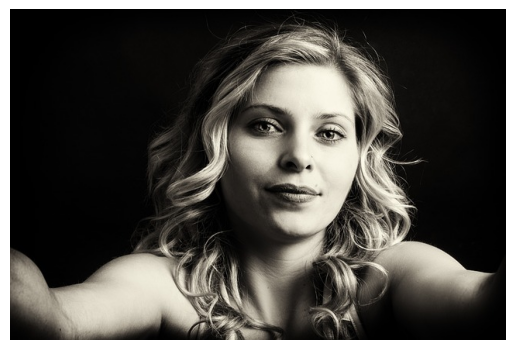

🖼️ D:\project\Localens_experiment\dataset\unlabeled\20230909_185137.jpg | RGB=(3,6,10) | Date=2025-10-31 16:26:17


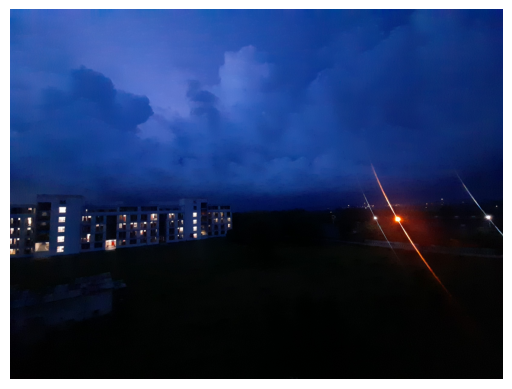

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230903-WA0048.jpg | RGB=(6,9,13) | Date=2025-10-31 16:26:02


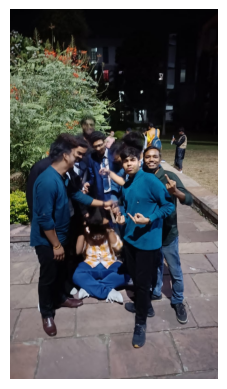

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230902-WA0071.jpg | RGB=(6,9,13) | Date=2025-10-31 16:25:41


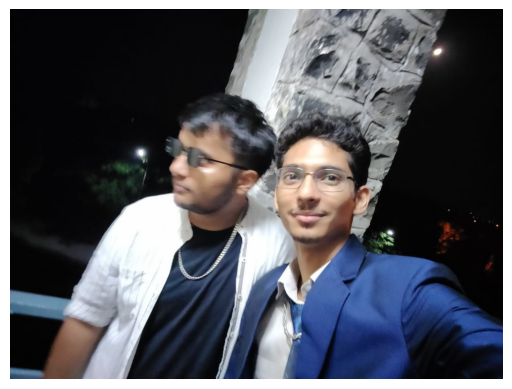

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20231021-WA0001.jpg | RGB=(13,9,7) | Date=2025-10-31 16:26:34


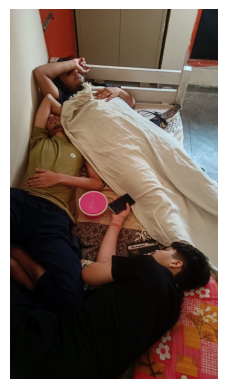

🖼️ D:\project\Localens_experiment\dataset\extra\beanie-g4c423e47b_640.jpg | RGB=(9,10,12) | Date=2025-10-31 16:24:53


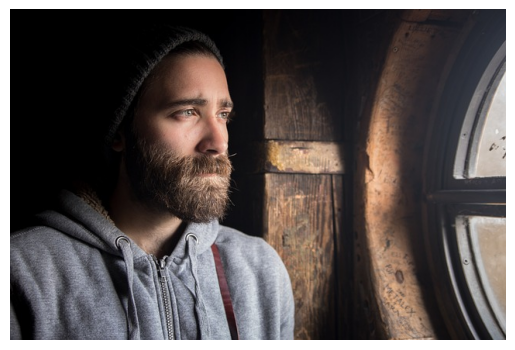

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230902-WA0031.jpg | RGB=(8,10,14) | Date=2025-10-31 16:25:26


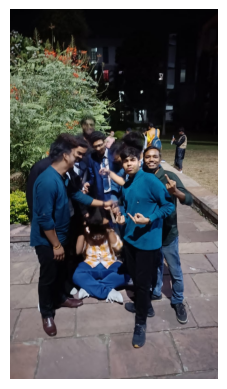

🖼️ D:\project\Localens_experiment\dataset\new_images\IMG-20230903-WA0041.jpg | RGB=(9,11,15) | Date=2025-10-31 16:25:59


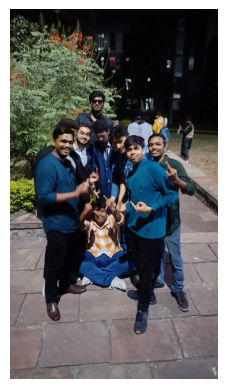

Search color:  pink



🎯 Top 10 matches for 'pink':

🖼️ D:\project\Localens_experiment\dataset\extra\cat-g0052cc4e9_640.jpg | RGB=(231,206,180) | Date=2025-10-31 16:24:54


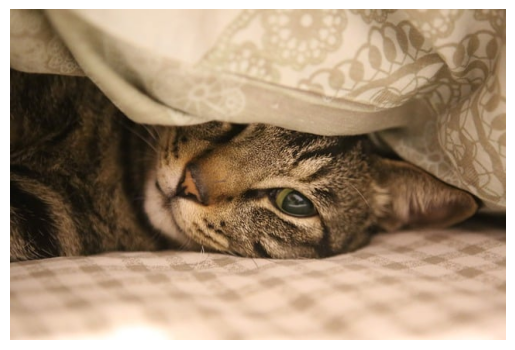

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0024.jpg | RGB=(218,203,183) | Date=2025-10-31 16:26:26


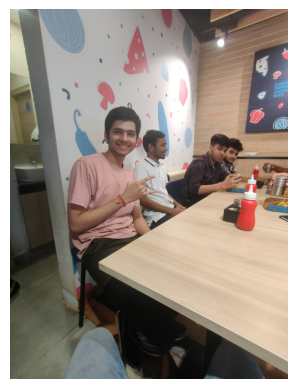

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0026.jpg | RGB=(214,202,177) | Date=2025-10-31 16:26:26


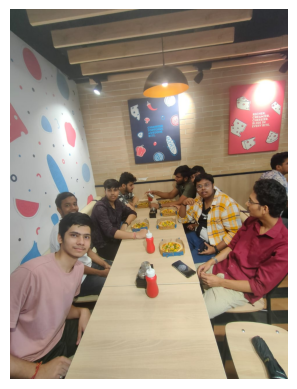

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0017.jpg | RGB=(220,215,198) | Date=2025-10-31 16:26:25


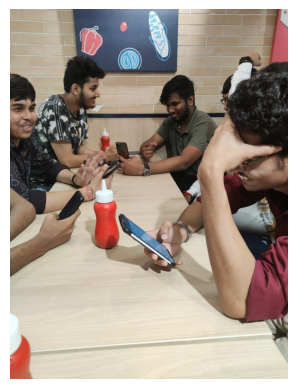

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0022.jpg | RGB=(213,199,175) | Date=2025-10-31 16:26:25


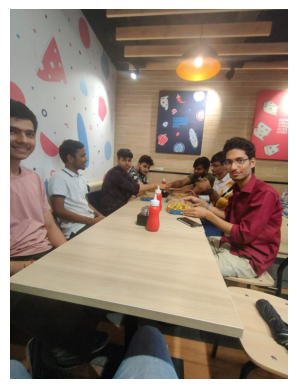

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0016.jpg | RGB=(210,188,170) | Date=2025-10-31 16:26:24


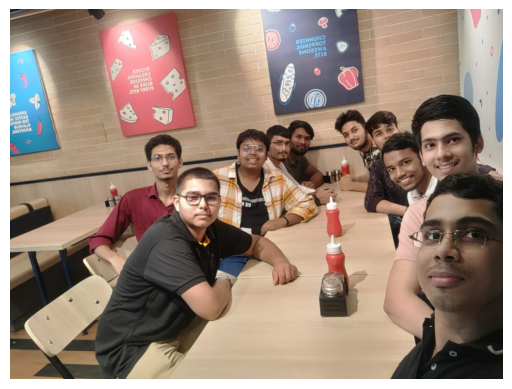

🖼️ D:\project\Localens_experiment\dataset\extra\puppy-g7bfbbf1d9_640.jpg | RGB=(223,217,212) | Date=2025-10-31 16:25:13


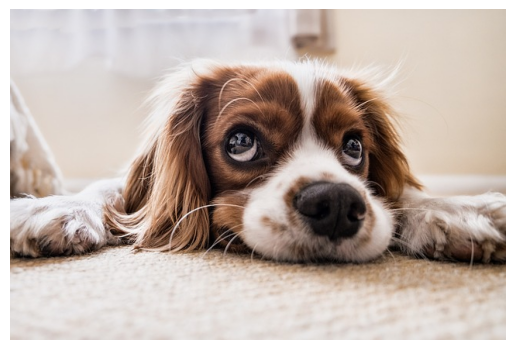

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0021.jpg | RGB=(210,189,169) | Date=2025-10-31 16:26:25


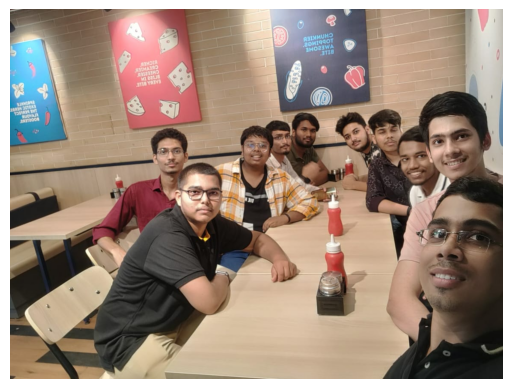

🖼️ D:\project\Localens_experiment\dataset\unlabeled\20231021_011534.jpg | RGB=(209,205,196) | Date=2025-10-31 16:26:19


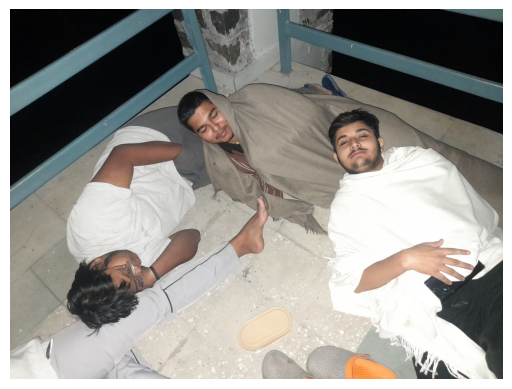

🖼️ D:\project\Localens_experiment\dataset\unlabeled\IMG-20230916-WA0025.jpg | RGB=(206,196,182) | Date=2025-10-31 16:26:26


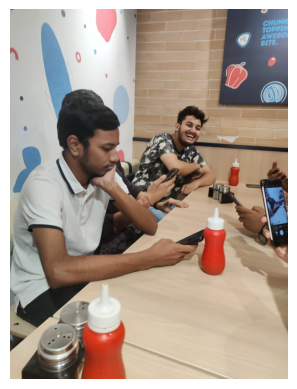

Search color:  exit


👋 Exiting search.


In [10]:
COLOR_REF = {
    "red": (255, 0, 0),
    "green": (0, 255, 0),
    "blue": (0, 0, 255),
    "yellow": (255, 255, 0),
    "orange": (255, 165, 0),
    "purple": (128, 0, 128),
    "white": (255, 255, 255),
    "black": (0, 0, 0),
    "brown": (150, 75, 0),
    "pink": (255, 182, 193),
    "gray": (128, 128, 128),
}

print("\n🎨 Color search ready! Type a color (e.g., 'red', 'blue') or 'exit' to quit.\n")

while True:
    query = input("Search color: ").strip().lower()
    if query == "exit":
        print("👋 Exiting search.")
        break

    if query not in COLOR_REF:
        print(f"❌ Unknown color '{query}'. Try one of: {', '.join(COLOR_REF.keys())}\n")
        continue

    target_rgb = np.array(COLOR_REF[query])

    # Calculate distance from query color
    df["dist"] = np.sqrt(
        (df["R"] - target_rgb[0]) ** 2 +
        (df["G"] - target_rgb[1]) ** 2 +
        (df["B"] - target_rgb[2]) ** 2
    )

    results = df.sort_values(["dist", "timestamp"], ascending=[True, False]).head(10)
    if results.empty:
        print(f"⚠️ No matches found for {query}.")
        continue

    print(f"\n🎯 Top 10 matches for '{query}':\n")
    for _, row in results.iterrows():
        print(f"🖼️ {row['path']} | RGB=({row['R']:.0f},{row['G']:.0f},{row['B']:.0f}) | Date={row['timestamp']}")
        img = cv2.imread(row["path"])
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.axis("off")
            plt.show()
